In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline


# Prepare Data

In [15]:
data: pd.DataFrame = pd.read_csv("ExampleRun_1kHz.csv",names=["Channel","Voltage","Time"])
data = data.drop("Channel",axis=1)
data = data.sort_values(by=["Time"])
data.head(5)


,Voltage,Time
0,-0.200000,0
5550,0.025197,0
97100,0.001575,0
37300,-0.012598,0
64150,0.001575,0


In [16]:
timeDiff = data.drop("Voltage",axis=1)

timeDiff = timeDiff.diff()
timeDiff = timeDiff.drop([0],axis=0)
timeDiff["Hertz"] = timeDiff.apply(lambda row: 1/(row[0]/1000), axis=1)
print(timeDiff.head(10))
print("Max time diff",timeDiff["Time"].max(),"Min Time diff",timeDiff["Time"].min())

<ipython-input-16-9bcde24b6a33>:5: RuntimeWarning: divide by zero encountered in double_scalars
  timeDiff["Hertz"] = timeDiff.apply(lambda row: 1/(row[0]/1000), axis=1)


        Time  Hertz
5550     0.0    inf
97100    0.0    inf
37300    0.0    inf
64150    0.0    inf
101000   0.0    inf
37350    0.0    inf
64200    0.0    inf
64100    0.0    inf
64050    0.0    inf
37450    0.0    inf
Max time diff 198.0 Min Time diff 0.0


# Frequency Analysis

### Average Frequency

In [17]:
average = timeDiff["Hertz"].mean()
average

inf

In [18]:

sigma = timeDiff["Hertz"].std()

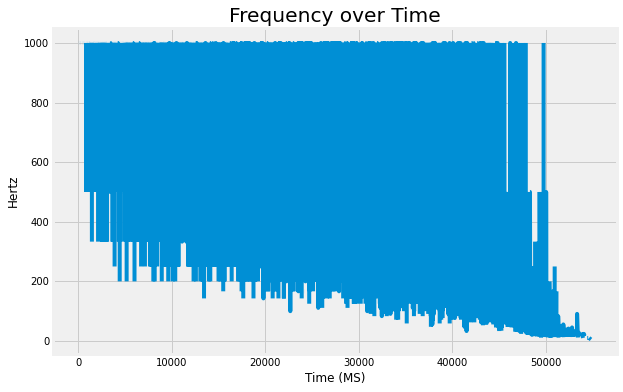

In [19]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(data["Time"].drop([0],axis=0),timeDiff["Hertz"])

# ax.fill_between(x,y,0, alpha=0.3, color='b')
# ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlabel('Time (MS)')
ax.set_ylabel('Hertz')

ax.set_title('Frequency over Time')

plt.savefig('graphs/frequency_over_time.png', dpi=72, bbox_inches='tight')
plt.show()

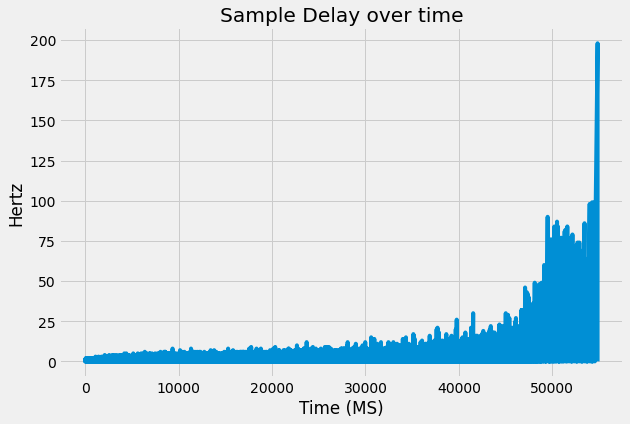

In [20]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(data["Time"].drop([0],axis=0),timeDiff["Time"])

# ax.fill_between(x,y,0, alpha=0.3, color='b')
# ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlabel('Time (MS)')
ax.set_ylabel('Hertz')

ax.set_title('Sample Delay over time')

plt.savefig('graphs/sample_delay_over_time.png', dpi=72, bbox_inches='tight')
plt.show()

# Voltage Analysis

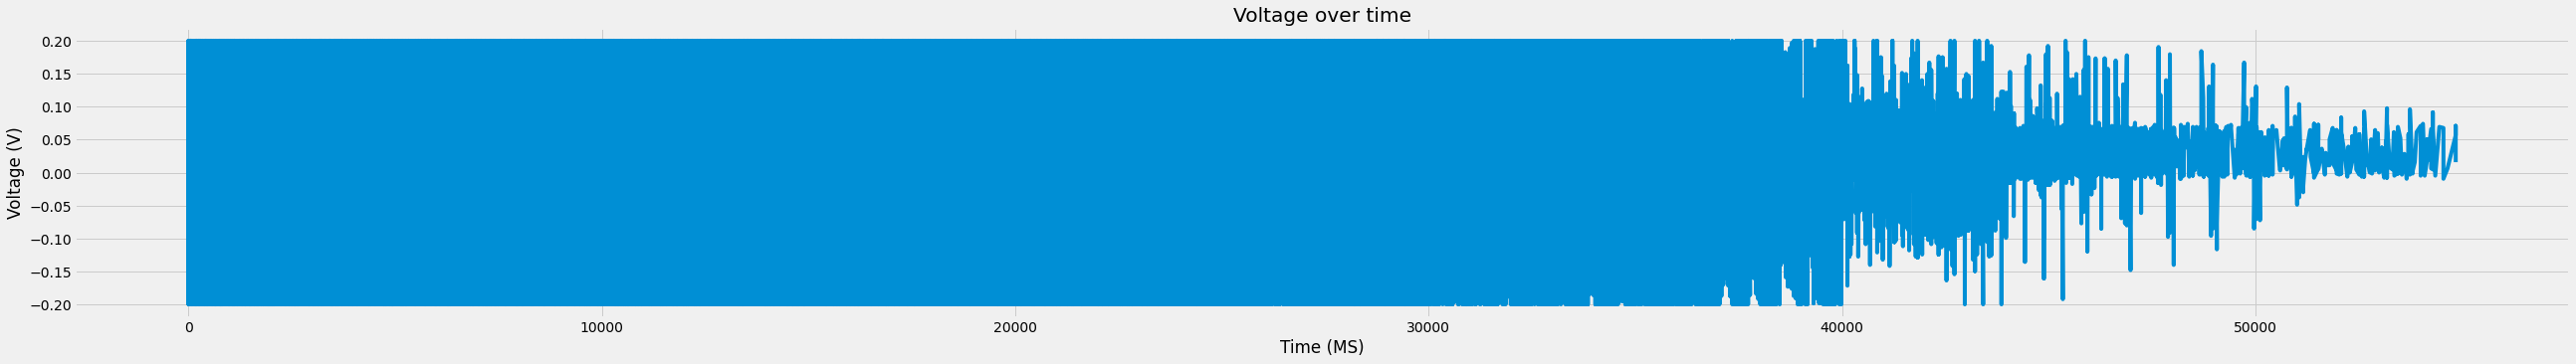

In [21]:
# build the plot
fig, ax = plt.subplots(figsize=(40,5))
plt.style.use('fivethirtyeight')
ax.plot(data["Time"],data["Voltage"])

# ax.fill_between(x,y,0, alpha=0.3, color='b')
# ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlabel('Time (MS)')
ax.set_ylabel('Voltage (V)')

ax.set_title('Voltage over time')

plt.savefig('graphs/summary_voltage.png', dpi=72, bbox_inches='tight')
plt.show()

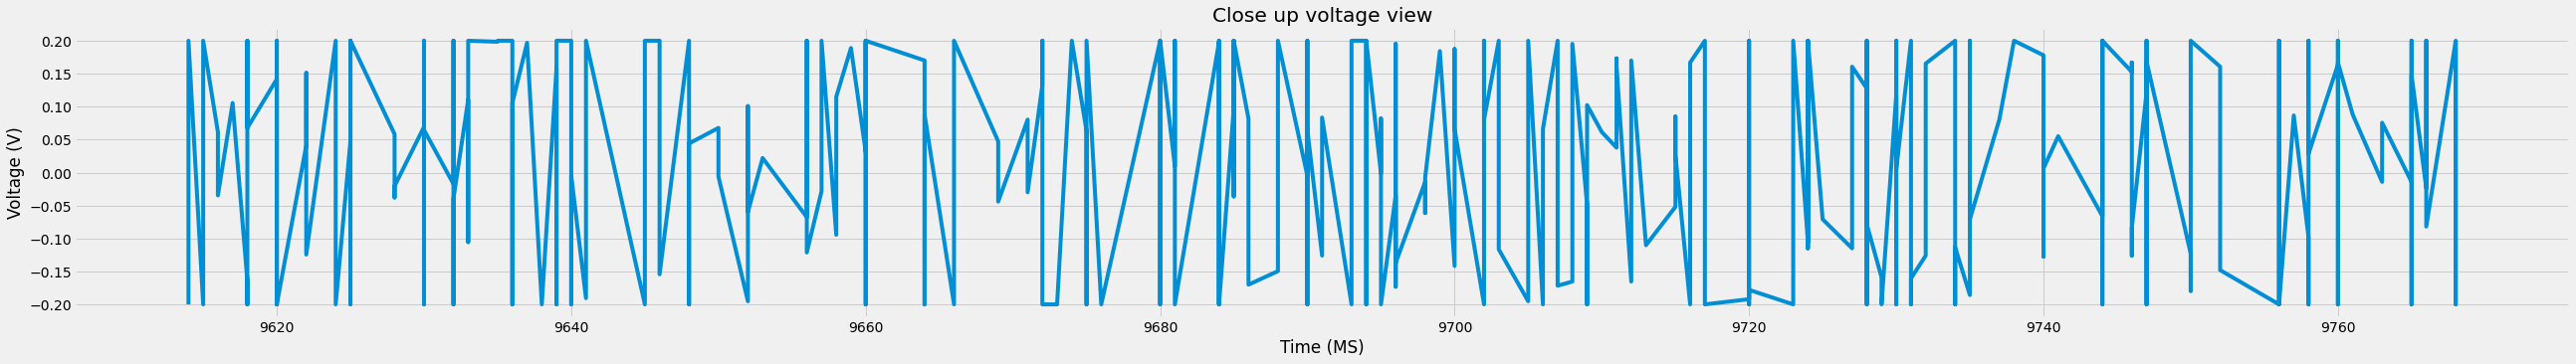

In [22]:
# build the plot
fig, ax = plt.subplots(figsize=(40,5))
plt.style.use('fivethirtyeight')
ax.plot(data["Time"][len(data["Time"])//2:(len(data["Time"])//2)+500],data["Voltage"][len(data["Time"])//2:(len(data["Time"])//2)+500])

# ax.fill_between(x,y,0, alpha=0.3, color='b')
# ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlabel('Time (MS)')
ax.set_ylabel('Voltage (V)')

ax.set_title('Close up voltage view')

plt.savefig('graphs/close_up_voltage.png', dpi=72, bbox_inches='tight')
plt.show()